# Customisation of the Second NLP Notebook

I decided to use two different data sets for this notebook as wanted to use the different techniques for their different abilities. For the decision tree and random forest I used a dataset that is mostly numerical and easy to one hot encode so that I wouldn't have to use bad of words or TFIDF to make the text into a numerical format. Therefore I used a dataset that explores the features of three different penguin species. 

For Ollama however I wanted something a bit more challenging and got a text base datset that it should classify. The dataset I used with ollama is about classifying whether a sentence is finished or not, and I was very curious to see if it could identify this!

(Also I did not use OpenAI as I did not have any credits and hence would have to pay and ollama was suitbale enough)

For the pengiun data set first we are just going to have a look at it and do some visualistaions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
# Load the penguins dataset

penguins_data = pd.read_csv('penguins_lter.csv')

# Display the first few rows of the dataset to understand its structure
penguins_data.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


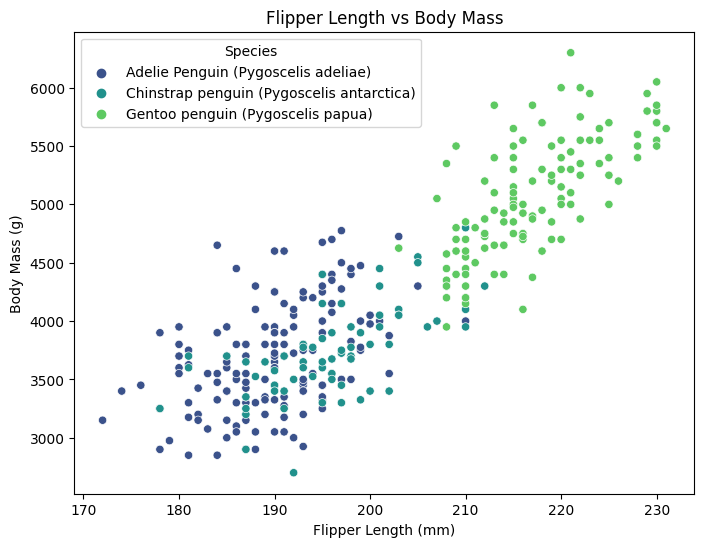

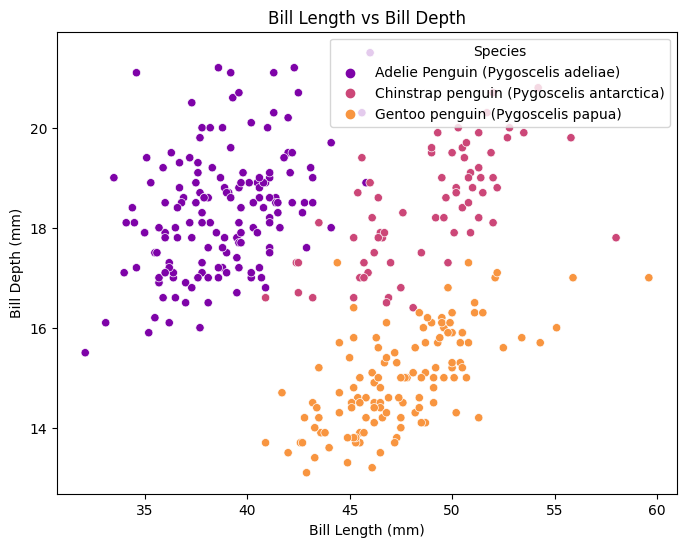

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Clean the dataset
penguins_cleaned = penguins_data[
    ['Flipper Length (mm)', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Species', 'Island', 'Clutch Completion']
].dropna()

# Scatter plot: Flipper Length vs. Body Mass
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_cleaned,
    x='Flipper Length (mm)',
    y='Body Mass (g)',
    hue='Species',
    palette='viridis'
)
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()

# Scatter plot: Bill Length vs. Bill Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins_cleaned,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    hue='Species',
    palette='plasma'
)
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.show()


The scatterplots show clear differences between the three spiecies when it comes to their body mass, flippers and bills but it shows us that the Chinstrap and Adelie Penguins are the most similar.

It also clearly shows, which makes sense, that a longer flipper leads to a higher body mass, while bill depth on the other hand does not correspond to bill length.

## Decision Tree

Next lets create a decision tree to help us to classify the different penguin species, to do this we need to create a training and test split to evaluate the accuracy. 

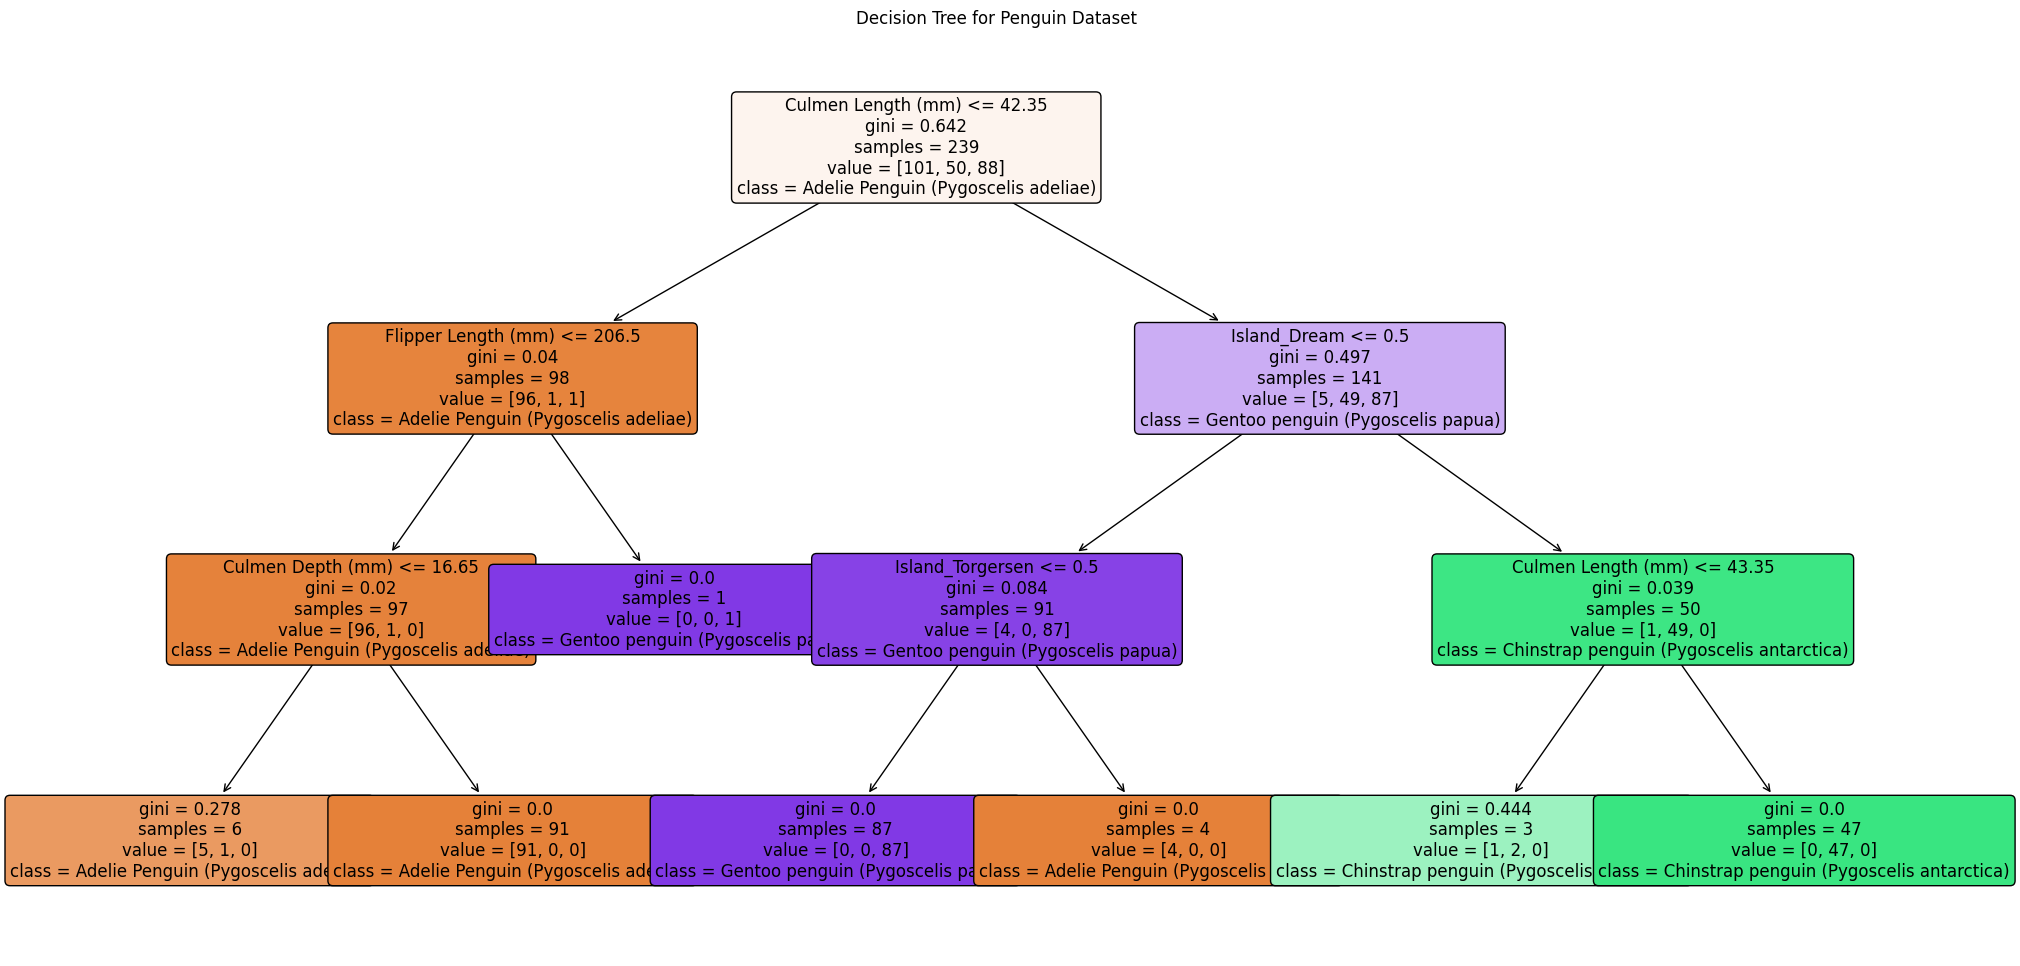

In [4]:

# Convert categorical variables to numeric (one-hot encoding for Island and Clutch Completion)
penguins_encoded = pd.get_dummies(penguins_cleaned, columns=['Island', 'Clutch Completion'], drop_first=True)

# Prepare the data for classification
X_penguins = penguins_encoded.drop(['Species'], axis=1)
y_penguins = penguins_cleaned['Species'].astype('category')
y_penguins_encoded = y_penguins.cat.codes

# Split the dataset into training and testing sets
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(
    X_penguins, y_penguins_encoded, test_size=0.3, random_state=42
)

# Create and train the Decision Tree Classifier
tree_clf_penguins = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_penguins.fit(X_train_penguins, y_train_penguins)

# Evaluate the model
y_pred_penguins = tree_clf_penguins.predict(X_test_penguins)
accuracy = accuracy_score(y_test_penguins, y_pred_penguins)
classification_rep = classification_report(
    y_test_penguins,
    y_pred_penguins,
    target_names=y_penguins.cat.categories.tolist()
)

# Visualize the decision tree with an increased figure size
plt.figure(figsize=(25, 12))  # Adjust the width and height
plot_tree(
    tree_clf_penguins,
    filled=True,
    feature_names=X_penguins.columns.tolist(),
    class_names=y_penguins.cat.categories.tolist(),
    rounded=True,
    fontsize=12  # Increase font size for readability
)
plt.title('Decision Tree for Penguin Dataset')
plt.show()





I think it id interesting how nether the Gentoo or Adelie Penguins have defining enough features but that they can be found on both sides of the branches of the original root node. I didnt expect this after the Gentoo penguins being different to the other species, but apperantly not when classifying them.

Next lets look at the alassification report to see how accurate the decision tree is.

In [5]:
# Generate the classification report as a dictionary
classification_report_dict = classification_report(
    y_test_penguins, y_pred_penguins, target_names=y_penguins.cat.categories.tolist(), output_dict=True
)

# Convert the classification report dictionary to a DataFrame
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Display the DataFrame as a plain-text table
print("\nClassification Report:")
print(classification_report_df.round(2))  # Round for better readability


Classification Report:
                                           precision  recall  f1-score  \
Adelie Penguin (Pygoscelis adeliae)             1.00    0.90      0.95   
Chinstrap penguin (Pygoscelis antarctica)       0.95    1.00      0.97   
Gentoo penguin (Pygoscelis papua)               0.90    1.00      0.95   
accuracy                                        0.95    0.95      0.95   
macro avg                                       0.95    0.97      0.96   
weighted avg                                    0.96    0.95      0.95   

                                           support  
Adelie Penguin (Pygoscelis adeliae)          50.00  
Chinstrap penguin (Pygoscelis antarctica)    18.00  
Gentoo penguin (Pygoscelis papua)            35.00  
accuracy                                      0.95  
macro avg                                   103.00  
weighted avg                                103.00  


So the precision is almost perfect for all of the penguins, especially the Adelie penguin.

## Random Forest

Lets explore a different classification technique to see if we can get even better results. Random Forest can also help us see what the most important features are to tell which penguin is which, this is good for real life as we can use this to look out for the main features when trying to identify penguins.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the cleaned penguins dataset with one-hot encoded features
penguins_cleaned = penguins_data[
    ['Flipper Length (mm)', 'Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Species', 'Island', 'Clutch Completion']
].dropna()

# Convert categorical variables to numeric (one-hot encoding for Island and Clutch Completion)
penguins_encoded = pd.get_dummies(penguins_cleaned, columns=['Island', 'Clutch Completion'], drop_first=True)

# Prepare features and target
X_penguins = penguins_encoded.drop(['Species'], axis=1)
y_penguins = penguins_cleaned['Species'].astype('category')
y_penguins_encoded = y_penguins.cat.codes

# Split the dataset into training and testing sets
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(
    X_penguins, y_penguins_encoded, test_size=0.3, random_state=42
)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_penguins, y_train_penguins)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_penguins)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test_penguins, rf_predictions, target_names=y_penguins.cat.categories.tolist()))
print("Accuracy:", accuracy_score(y_test_penguins, rf_predictions))

# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
feature_names = X_penguins.columns

# Map feature importances to their corresponding feature names
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Sort the features by importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the most important features
print("\nTop 10 Important Features:")
for feature, importance in sorted_feature_importances[:10]:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Classification Report:
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.98      0.99        50
Chinstrap penguin (Pygoscelis antarctica)       0.95      1.00      0.97        18
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        35

                                 accuracy                           0.99       103
                                macro avg       0.98      0.99      0.99       103
                             weighted avg       0.99      0.99      0.99       103

Accuracy: 0.9902912621359223

Top 10 Important Features:
Feature: Culmen Length (mm), Importance: 0.3456
Feature: Flipper Length (mm), Importance: 0.2341
Feature: Body Mass (g), Importance: 0.1666
Feature: Culmen Depth (mm), Importance: 0.1370
Feature: Island_Dream, Importance: 0.0892
Feature: Island_Torgersen, Importance: 0.0227
Feature: Clutch Completion_Yes, Importance: 0.0047


As we can see the culmen length, which is the length of its beak is the most important, so next time you see a penguin look out for how long its beak is!!!

## Ollama  and llama 3.2 

We are now switching to a different data set. This data set has contains sentences and labeled whether they are finished or not. I want to see if ollama can classify them.

I am only processing the first 200 as there are more than 53000 rows which would take too long

I also added a check that checks whether or not ollama got it based on the label and a counter that counts how many sentences it got correct.

In [7]:
import pandas as pd
import ollama

# Load the dataset
sentences = pd.read_csv('finished_sentences.csv')

sentences.head()

,sentence,is_finished
0,"Apple supplier AMS cuts forecast, indicating p...",Finished
1,U.S. factory and services activity quicken in ...,Finished
2,Exclusive: Tesla expects global shortage of el...,Unfinished
3,"World stocks climb on China trade relief, whil...",Finished
4,"Boeing, J&J, dismal China data drag Wall Stree...",Finished


In [8]:
import pandas as pd
import ollama

sentences = pd.read_csv('finished_sentences.csv')

print("Total sentences loaded:", len(sentences))

# Only process the first 200 sentences
sentences = sentences.head(200)

print("Total sentences to process:", len(sentences))

# This is our classification prompt
PROMPT = """Classify whether the given sentence is finished.
Respond with 'Yes' if the sentence is finished, and 'No' if it is not.
No explanation is needed."""

# Function to analyze a sentence
def analyze_sentence(text):
    response = ollama.chat(model='llama3.2', messages=[
        {
            'role': 'user',
            'content': f'{PROMPT}\n\n"{text}"?',
        },
    ])
    return response['message']['content']

# Initialize a new column to store results
sentences['model_result'] = None
sentences['comparison'] = None

# Process the sentences
correct_count = 0  # Initialize the correct count
for index, row in sentences.iterrows():
    try:
        result = analyze_sentence(row['sentence'])  # Uses the 'sentence' column
        sentences.at[index, 'model_result'] = result
        # Convert model result to match existing classification terms
        model_answer = "Finished" if result == "Yes" else "Unfinished"
        # Compare model result with actual data
        is_correct = (model_answer == row['is_finished'])
        sentences.at[index, 'comparison'] = is_correct
        if is_correct:
            correct_count += 1  # Increment correct count if the prediction is right
        print(f"Processed index {index}: {result}, Actual: {row['is_finished']}, Correct: {is_correct}")
    except Exception as e:
        print(f"Error processing index {index}: {str(e)}")

# Save the results
sentences.to_csv('ollama.csv', encoding='utf-8', index=False)

# Print the total number of correct and incorrect classifications
print(f"Total Correct: {correct_count}")
print(f"Total Incorrect: {len(sentences) - correct_count}")
print(sentences['comparison'].value_counts())



Total sentences loaded: 53149
Total sentences to process: 200
Processed index 0: Yes, Actual: Finished, Correct: True
Processed index 1: Yes, Actual: Finished, Correct: True
Processed index 2: Yes., Actual: Unfinished, Correct: True
Processed index 3: Yes, Actual: Finished, Correct: True
Processed index 4: No, Actual: Finished, Correct: False
Processed index 5: No, Actual: Finished, Correct: False
Processed index 6: No, Actual: Finished, Correct: False
Processed index 7: No, Actual: Finished, Correct: False
Processed index 8: Yes., Actual: Finished, Correct: False
Processed index 9: Yes., Actual: Finished, Correct: False
Processed index 10: Yes., Actual: Finished, Correct: False
Processed index 11: No, Actual: Finished, Correct: False
Processed index 12: Yes., Actual: Finished, Correct: False
Processed index 13: No, Actual: Finished, Correct: False
Processed index 14: Yes., Actual: Finished, Correct: False
Processed index 15: No, Actual: Finished, Correct: False
Processed index 16: No,

From this we can see that actually ollama was very bad as it got more than half wrong. However, I think that the task was very challenging as I had a look at the sentences and even I did not know if they were finished or not. 

## Supervised Bert model

Now lets train our supervised bert model.

Again I couldnt run this code in VSCode but had to run it on google collab. 


In [9]:
# Import necessary packages
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import torch

# Load the dataset
df = pd.read_csv('finished_sentences.csv')

df = df.head(200)

# Rename the columns for aesthetic reasons
df = df.rename(columns={'sentence':'text', 'is_finished':'label'})

# Convert labels from strings to integers: Finished -> 1, Unfinished -> 0
label_dict = {'Finished': 1, 'Unfinished': 0}
df['label'] = df['label'].map(label_dict)

# Split the data into training and validation sets
train_df, eval_df = train_test_split(df, test_size=0.1)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function to preprocess the text data
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

# Create Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
train_dataset = train_dataset.map(tokenize_data, batched=True)
eval_dataset = eval_dataset.map(tokenize_data, batched=True)

# Load BERT with a sequence classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Metric computation: we define this to get more details on the performance of the model
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

# Train and evaluate
trainer.train()

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/69 [00:00<?, ?it/s]

Error: Canceled future for execute_request message before replies were done

This was the outcome on the google colab:

Epoch	Training Loss	Validation Loss	Accuracy	F1	Precision	Recall

1	0.747100	0.644440	0.700000	0.823529	0.875000	0.777778

2	0.548400	0.403477	0.900000	0.947368	0.900000	1.000000

3	0.451100	0.347255	0.900000	0.947368	0.900000	1.000000



#### Interpreting the Supervised Bert Model


In [ ]:
# Let's check the model's final performance!
results = trainer.evaluate()
print(results)

{'eval_loss': 0.34725522994995117, 'eval_accuracy': 0.9, 'eval_f1': 0.9473684210526315, 'eval_precision': 0.9, 'eval_recall': 1.0, 'eval_runtime': 15.2078, 'eval_samples_per_second': 1.315, 'eval_steps_per_second': 0.132, 'epoch': 3.0}

# Model Evaluation Summary

- **eval_loss**: 0.347255 – This shows minimal prediction error on the validation set, highlighting the model's precision.  
- **eval_accuracy**: 90% – This shows the model's ability to correctly classify 90% of the sentences with the correct label of being finished or unfinished. This is a big change to the ollama model which had less than a 50% accuracy.   
- **eval_f1**: 0.947 – Again shows how accurate the model is and is the mean between precision and recall. 
- **eval_precision**: 90% – Same as accuracy shows that 90% of the data was labeled correctly.  
- **eval_recall**: 100% – A flawless result, demonstrating that the model captured all true positives.  
- **eval_runtime**: 15.2 seconds – shows that the model was very fast in processing the validation set.   
- **eval_samples_per_second**: 1.315 and **eval_steps_per_second**: 0.132 – Indicates the model's reliable validation speed.  

# Conclusion

These metrics illustrate a well-optimized model, that delivers consistent performance across all areas.It does really well and if I could run it on vscode I would do aditional testing on more data. 
